In [64]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [65]:
!pip install opencv-python



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [67]:
img=cv2.imread(r'.\dataset\mahendra\dhoni (1).png')
img.shape

(320, 320, 3)

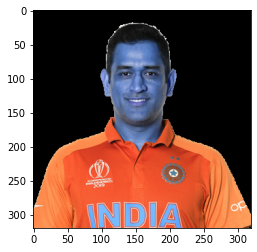

In [68]:
plt.imshow(img)

In [69]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

In [70]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [131, 133, 132, ...,  43,  62,  70],
       [123, 129, 127, ...,  79,   0,   0],
       [154, 133, 134, ...,   0,   0,   0]], dtype=uint8)

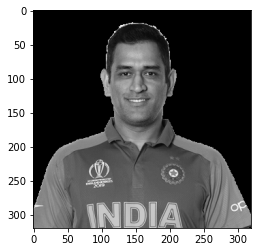

In [71]:
plt.imshow(gray,cmap='gray')

In [72]:
face_cascade=cv2.CascadeClassifier(r'.\opencv\haarcascades\haarcascade_frontalface_default.xml')
eyes_cascade=cv2.CascadeClassifier(r'.\opencv\haarcascades\haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 99,  48, 114, 114]])

In [73]:
faces[0]

array([ 99,  48, 114, 114])

In [74]:
(x,y,w,h)=faces[0]

In [75]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
face_img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[250, 136,  75],
        [254, 138,  77],
        [254, 137,  77],
        ...,
        [ 87,  47,  19],
        [ 93,  67,  42],
        [ 91,  74,  54]],

       [[224, 129,  72],
        [239, 135,  76],
        [250, 132,  71],
        ...,
        [104,  83,  62],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192, 161, 127],
        [215, 139,  91],
        [222, 139,  90],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

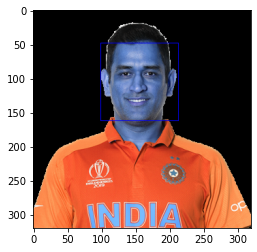

In [76]:
plt.imshow(face_img)

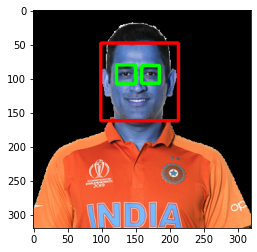

In [77]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

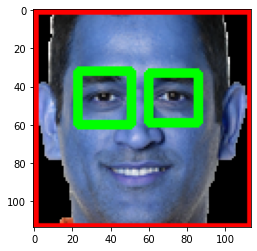

In [78]:
plt.imshow(roi_color)

In [79]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [80]:
new_img=get_cropped_image_if_2_eyes(r'C:\Users\Administrator\Sports Image Classifier\model\dataset\mahendra\dhoni (56).jpg')
new_img

array([[[  3,   0,  16],
        [  3,   1,   7],
        [  5,   4,   0],
        ...,
        [ 78, 122, 176],
        [ 76, 118, 171],
        [ 75, 115, 167]],

       [[  4,   0,   8],
        [  5,   0,   1],
        [  6,   3,   0],
        ...,
        [ 49,  91, 133],
        [ 47,  88, 127],
        [ 44,  85, 124]],

       [[  6,   0,   5],
        [  5,   0,   0],
        [  7,   1,   0],
        ...,
        [ 27,  68, 100],
        [ 28,  66,  96],
        [ 27,  66,  94]],

       ...,

       [[ 68, 130, 244],
        [ 79, 138, 247],
        [ 63, 118, 217],
        ...,
        [  4,   0,   6],
        [  0,   2,  16],
        [  0,   5,  32]],

       [[ 71, 131, 245],
        [ 83, 141, 247],
        [ 69, 122, 219],
        ...,
        [  9,   1,   2],
        [  4,   1,  10],
        [  0,   0,  21]],

       [[ 74, 134, 247],
        [ 88, 146, 252],
        [ 75, 128, 225],
        ...,
        [ 12,   0,   0],
        [  5,   0,   4],
        [  0,   0,  16]]

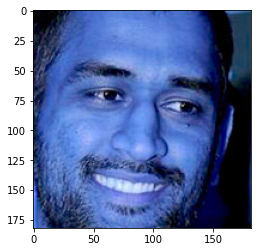

In [81]:
plt.imshow(new_img)

In [82]:
import os

_,_,files = next(os.walk(r"C:.\dataset\mahendra"))
file_count = len(files)
file_count

151

In [83]:
#mahendra:151
#ravindra:79
#rohit:83
#sachin:150
#virat:86
import os

_,_,files = next(os.walk(r"C:\Users\Administrator\Sports Image Classifier\model\dataset\ravindra"))
file_count = len(files)
file_count

79

In [84]:
#To create a cropped folder inside dataset folder
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [85]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
print(img_dirs)

['./dataset/cropped', './dataset/mahendra', './dataset/ravindra', './dataset/rohit', './dataset/sachin', './dataset/virat']


In [86]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [87]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
mahendra
Generating cropped images in folder:  ./dataset/cropped/mahendra
ravindra
Generating cropped images in folder:  ./dataset/cropped/ravindra
rohit
Generating cropped images in folder:  ./dataset/cropped/rohit
sachin
Generating cropped images in folder:  ./dataset/cropped/sachin
virat
Generating cropped images in folder:  ./dataset/cropped/virat


In [88]:
#Feature Engineering
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'mahendra': ['./dataset/cropped/mahendra\\mahendra1.png',
  './dataset/cropped/mahendra\\mahendra10.png',
  './dataset/cropped/mahendra\\mahendra11.png',
  './dataset/cropped/mahendra\\mahendra12.png',
  './dataset/cropped/mahendra\\mahendra13.png',
  './dataset/cropped/mahendra\\mahendra14.png',
  './dataset/cropped/mahendra\\mahendra15.png',
  './dataset/cropped/mahendra\\mahendra16.png',
  './dataset/cropped/mahendra\\mahendra17.png',
  './dataset/cropped/mahendra\\mahendra18.png',
  './dataset/cropped/mahendra\\mahendra19.png',
  './dataset/cropped/mahendra\\mahendra2.png',
  './dataset/cropped/mahendra\\mahendra20.png',
  './dataset/cropped/mahendra\\mahendra21.png',
  './dataset/cropped/mahendra\\mahendra22.png',
  './dataset/cropped/mahendra\\mahendra23.png',
  './dataset/cropped/mahendra\\mahendra24.png',
  './dataset/cropped/mahendra\\mahendra25.png',
  './dataset/cropped/mahendra\\mahendra26.png',
  './dataset/cropped/mahendra\\mahendra27.png',
  './dataset/cropped/mahendra\

In [89]:
entry.path

'./dataset/cropped/virat\\virat9.png'

In [90]:
#Feature extraction
import numpy as np
import pywt
import cv2    
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    #print(coeffs)
    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H


In [91]:
new_img=cv2.imread(r'C:.\dataset\cropped\mahendra\mahendra11.png')


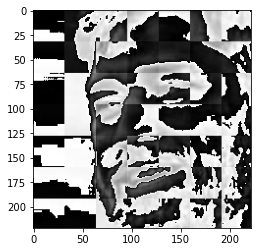

In [92]:
im_har=w2d(new_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [93]:
celebrity_file_names_dict

{'mahendra': ['./dataset/cropped/mahendra\\mahendra1.png',
  './dataset/cropped/mahendra\\mahendra10.png',
  './dataset/cropped/mahendra\\mahendra11.png',
  './dataset/cropped/mahendra\\mahendra12.png',
  './dataset/cropped/mahendra\\mahendra13.png',
  './dataset/cropped/mahendra\\mahendra14.png',
  './dataset/cropped/mahendra\\mahendra15.png',
  './dataset/cropped/mahendra\\mahendra16.png',
  './dataset/cropped/mahendra\\mahendra17.png',
  './dataset/cropped/mahendra\\mahendra18.png',
  './dataset/cropped/mahendra\\mahendra19.png',
  './dataset/cropped/mahendra\\mahendra2.png',
  './dataset/cropped/mahendra\\mahendra20.png',
  './dataset/cropped/mahendra\\mahendra21.png',
  './dataset/cropped/mahendra\\mahendra22.png',
  './dataset/cropped/mahendra\\mahendra23.png',
  './dataset/cropped/mahendra\\mahendra24.png',
  './dataset/cropped/mahendra\\mahendra25.png',
  './dataset/cropped/mahendra\\mahendra26.png',
  './dataset/cropped/mahendra\\mahendra27.png',
  './dataset/cropped/mahendra\

In [94]:
celebrity_file_names_dict.keys()

dict_keys(['mahendra', 'ravindra', 'rohit', 'sachin', 'virat'])

In [95]:
celebrity_file_names_dict.items()

dict_items([('mahendra', ['./dataset/cropped/mahendra\\mahendra1.png', './dataset/cropped/mahendra\\mahendra10.png', './dataset/cropped/mahendra\\mahendra11.png', './dataset/cropped/mahendra\\mahendra12.png', './dataset/cropped/mahendra\\mahendra13.png', './dataset/cropped/mahendra\\mahendra14.png', './dataset/cropped/mahendra\\mahendra15.png', './dataset/cropped/mahendra\\mahendra16.png', './dataset/cropped/mahendra\\mahendra17.png', './dataset/cropped/mahendra\\mahendra18.png', './dataset/cropped/mahendra\\mahendra19.png', './dataset/cropped/mahendra\\mahendra2.png', './dataset/cropped/mahendra\\mahendra20.png', './dataset/cropped/mahendra\\mahendra21.png', './dataset/cropped/mahendra\\mahendra22.png', './dataset/cropped/mahendra\\mahendra23.png', './dataset/cropped/mahendra\\mahendra24.png', './dataset/cropped/mahendra\\mahendra25.png', './dataset/cropped/mahendra\\mahendra26.png', './dataset/cropped/mahendra\\mahendra27.png', './dataset/cropped/mahendra\\mahendra28.png', './dataset

In [96]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] =count
    count=count+1
class_dict

{'mahendra': 0, 'ravindra': 1, 'rohit': 2, 'sachin': 3, 'virat': 4}

In [97]:
celebrity_file_names_dict.items()

dict_items([('mahendra', ['./dataset/cropped/mahendra\\mahendra1.png', './dataset/cropped/mahendra\\mahendra10.png', './dataset/cropped/mahendra\\mahendra11.png', './dataset/cropped/mahendra\\mahendra12.png', './dataset/cropped/mahendra\\mahendra13.png', './dataset/cropped/mahendra\\mahendra14.png', './dataset/cropped/mahendra\\mahendra15.png', './dataset/cropped/mahendra\\mahendra16.png', './dataset/cropped/mahendra\\mahendra17.png', './dataset/cropped/mahendra\\mahendra18.png', './dataset/cropped/mahendra\\mahendra19.png', './dataset/cropped/mahendra\\mahendra2.png', './dataset/cropped/mahendra\\mahendra20.png', './dataset/cropped/mahendra\\mahendra21.png', './dataset/cropped/mahendra\\mahendra22.png', './dataset/cropped/mahendra\\mahendra23.png', './dataset/cropped/mahendra\\mahendra24.png', './dataset/cropped/mahendra\\mahendra25.png', './dataset/cropped/mahendra\\mahendra26.png', './dataset/cropped/mahendra\\mahendra27.png', './dataset/cropped/mahendra\\mahendra28.png', './dataset

In [98]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [99]:
X[0] #1st image arrays

array([[  0],
       [  0],
       [  0],
       ...,
       [250],
       [250],
       [250]], dtype=uint8)

In [36]:
import numpy as np

a = np.array([1, 2])
b = np.array([3, 4])
print(a,b)
c = np.vstack((a, b))
print(c)

[1 2] [3 4]
[[1 2]
 [3 4]]


In [100]:
len(X[0])#size of image 32*32*3(raw image) + 32*32(wavelength image)

4096

In [101]:
len(X) #Total no.of input images

201

In [102]:
len(y)

201

In [40]:
#pywt library,signal processing,fourier transform,frequency domain

In [103]:
y[2]

0

In [107]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [108]:
#just reshape an image convert into float
#Every image represents as one dimesional list in the form of an array
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(201, 4096)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [110]:
print("Total no.of I/P training examples",len(X_train))
print("Total no.of O/P training examples",len(y_train))
print("Total no.of I/P Testing examples",len(X_test))
print("Total no.of O/P Testing examples",len(y_test))


Total no.of I/P training examples 150
Total no.of O/P training examples 150
Total no.of I/P Testing examples 51
Total no.of O/P Testing examples 51


In [111]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC(kernel = 'linear', C = 40))])
pipe.fit(X_train, y_train)
print("Testing accuracy",pipe.score(X_test, y_test)) 
print("Training accuracy",pipe.score(X_train,y_train))

Testing accuracy 0.7450980392156863
Training accuracy 1.0


In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X)
print(X)
print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.
StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

In [112]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'svc__C': [10,100,1000,10000,100000],
            'svc__kernel': ['linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [15,10,15,20]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'logisticregression__C': [10]
        }
    }
}

In [49]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5 ,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

,model,best_score,best_params
0,svm,0.626667,"{'svc__C': 10, 'svc__kernel': 'linear'}"
1,random_forest,0.573333,{'randomforestclassifier__n_estimators': 20}
2,logistic_regression,0.680000,{'logisticregression__C': 10}


In [50]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, kernel='linear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=20))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=10))])}

In [51]:
best_estimators['svm'].score(X_test,y_test)

0.7450980392156863

In [52]:
best_estimators['random_forest'].score(X_test,y_test)

0.5490196078431373

In [53]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7450980392156863

In [54]:
best_estimators['svm'].score(X_train,y_train)

1.0

In [55]:
best_estimators['random_forest'].score(X_train,y_train)

1.0

In [56]:
best_estimators['logistic_regression'].score(X_train,y_train)

1.0

In [57]:
best_clf = best_estimators['svm']


In [58]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [59]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [60]:
class_dict

{'mahendra': 0, 'ravindra': 1, 'rohit': 2, 'sachin': 3, 'virat': 4}